# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4289/843001595.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

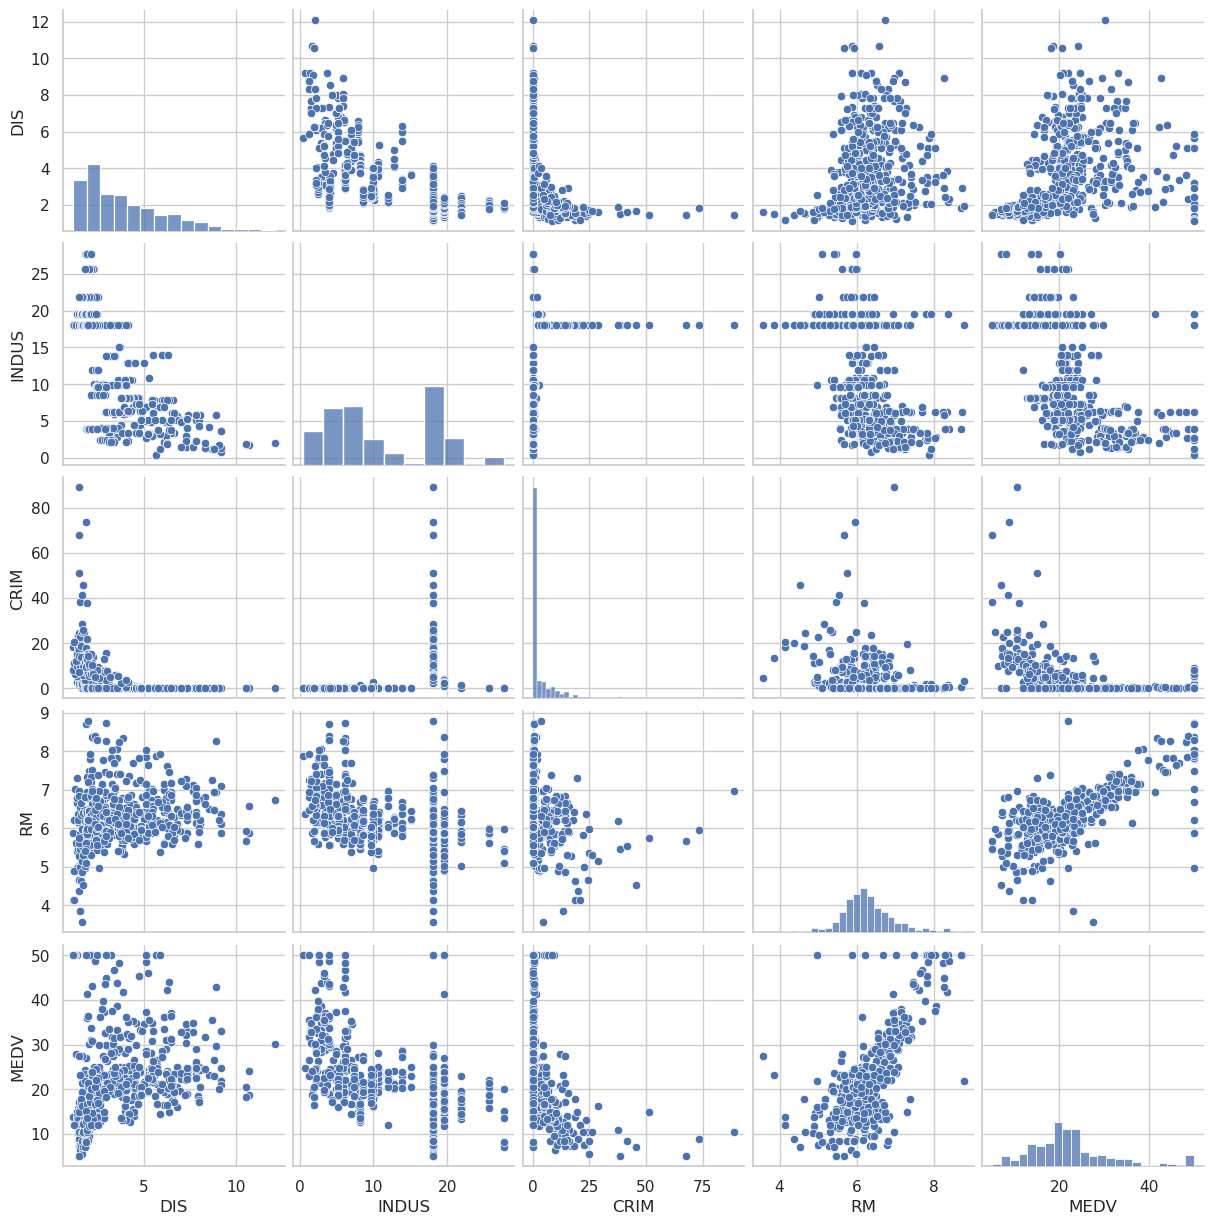

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', context='notebook')
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

<Axes: >

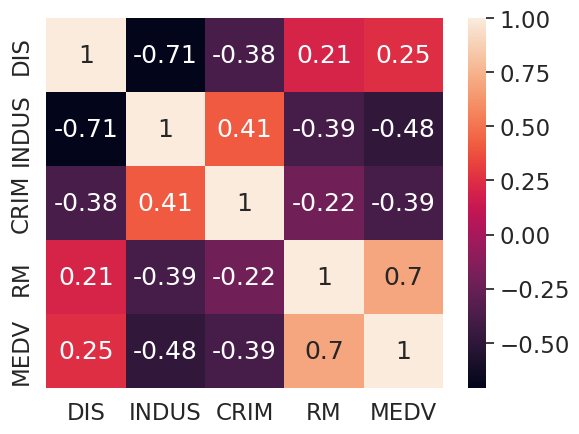

In [5]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)


## Creando modelo con scikit-learn

In [7]:
# Preparación para un Modelo de Regresión Lineal: Estandarización de Datos
#
# Objetivo: Preparar las variables de entrada (X) y de salida (y) para entrenar
# un modelo de regresión lineal. El paso clave aquí es la estandarización,
# que asegura que nuestras variables tengan una escala comparable.
# =======================================================================================

# --- 1. Importación de las Librerías Necesarias ---

# De la librería `scikit-learn`, importamos las herramientas que vamos a utilizar.
# `StandardScaler` es una clase que nos ayuda a estandarizar nuestros datos.
from sklearn.preprocessing import StandardScaler
# `LinearRegression` es la clase que contiene el algoritmo de regresión lineal.
from sklearn.linear_model import LinearRegression

# --- 2. Selección y Preparación de los Datos ---

# Seleccionamos la columna 'RM' (promedio de habitaciones por vivienda) como nuestra
# variable independiente o predictora (X).
# `.values` convierte la columna de pandas en un array de NumPy.
# `.reshape(-1, 1)` cambia la forma del array. Scikit-learn espera que los datos de entrada (X)
# sean una matriz 2D (una tabla), donde las filas son las muestras y las columnas son las
# características. Al pasar de un array de (n,) a (n, 1), cumplimos con este requisito.
X = df['RM'].values.reshape(-1, 1)

# Hacemos lo mismo para nuestra variable dependiente o a predecir (y), que es 'MEDV'
# (valor mediano de las viviendas). Aunque para 'y' no siempre es estrictamente necesario
# redimensionarla, es una buena práctica para mantener la consistencia.
y = df['MEDV'].values.reshape(-1, 1)


# --- 3. Estandarización de los Datos ---

# La estandarización es un paso de preprocesamiento crucial. Transforma los datos
# para que tengan una media de 0 y una desviación estándar de 1. Esto es importante
# para muchos algoritmos de machine learning.

# Creamos una instancia del escalador para nuestra variable X.
# Piensa en `sc_x` como una "máquina" lista para aprender a estandarizar datos.
sc_x = StandardScaler()
# Creamos otra instancia independiente para nuestra variable y.
# Es importante usar escaladores separados para X e y, ya que tienen medias
# y desviaciones estándar diferentes.
sc_y = StandardScaler()

# Usamos el método `.fit_transform()` en nuestros datos. Este método hace dos cosas en un solo paso:
# 1. `.fit()`: El escalador "aprende" los parámetros de los datos de X (su media y desviación estándar).
# 2. `.transform()`: Utiliza esos parámetros aprendidos para transformar los datos de X.
# `X_std` ahora contiene los valores de 'RM' estandarizados.
X_std = sc_x.fit_transform(X)

# Hacemos lo mismo para 'y'. `sc_y` aprende los parámetros de 'MEDV' y los transforma.
# `y_std` ahora contiene los valores de 'MEDV' estandarizados.
y_std = sc_y.fit_transform(y)


# --- 4. Entrenamiento del Modelo de Regresión Lineal ---

# Creamos una instancia del modelo de regresión lineal.
# `slr` es ahora nuestro objeto de modelo, listo para ser entrenado.
slr = LinearRegression()

# Usamos el método `.fit()` para entrenar el modelo.
# Le pasamos nuestros datos estandarizados. El modelo aprenderá la relación lineal
# que existe entre el número de habitaciones estandarizado (`X_std`) y el valor
# de la vivienda estandarizado (`y_std`).
# En este paso, el algoritmo calcula la pendiente y el intercepto óptimos que
# mejor describen la relación entre estas dos variables.
slr.fit(X_std, y_std)

# Después de esta línea, el objeto `slr` contiene un modelo entrenado y listo para hacer predicciones.



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Análisis de resultados

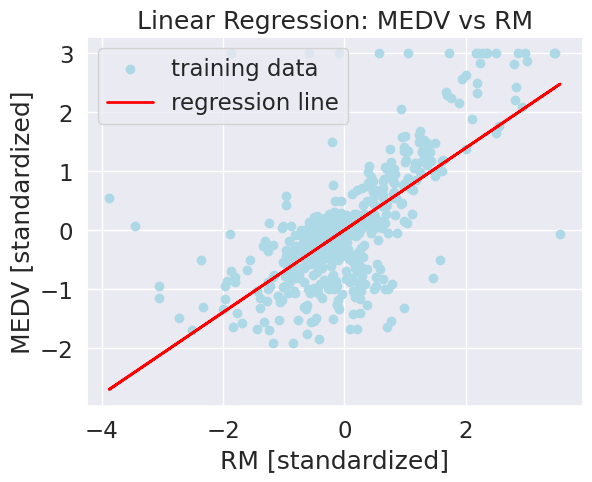

In [8]:
# =======================================================================================
# Visualización del Modelo de Regresión Lineal
#
# Objetivo: Crear un gráfico que muestre la relación entre los datos de entrenamiento
# y la línea de mejor ajuste calculada por el modelo de regresión lineal.
# =======================================================================================

# --- 1. Dibujando los Datos Originales (Scatter Plot) ---

# `plt.scatter()` crea un gráfico de dispersión. Es ideal para visualizar la
# relación entre dos variables, donde cada punto representa una observación.
plt.scatter(X_std,y_std,           # Eje X: Número de habitaciones estandarizado.
                                   # Eje Y: Valor de la vivienda estandarizado.
            c='lightblue',         # `c`: Define el color de los puntos (azul claro).
            marker='o',            # `marker`: Define la forma de los marcadores (círculos).
            label='training data'  # `label`: Asigna un nombre a este conjunto de datos
                                   # para que aparezca en la leyenda del gráfico.
           )


# --- 2. Dibujando la Línea de Regresión del Modelo ---

# `plt.plot()` crea un gráfico de líneas. Lo usamos para dibujar la línea de mejor
# ajuste que nuestro modelo (`slr`) ha aprendido.
plt.plot(X_std,                     # Eje X: Los mismos valores de entrada que nuestros datos.
         slr.predict(X_std),      # Eje Y: Para cada punto de X_std, usamos el modelo entrenado (`slr`)
                                   # para PREDECIR cuál sería el valor de Y. El resultado es el
                                   # conjunto de puntos que forman la línea de regresión.
         color='red',               # `color`: Define el color de la línea (rojo).
         linewidth=2,               # `linewidth`: Define el grosor de la línea.
         label='regression line'    # `label`: Asigna un nombre a la línea para la leyenda.
        )


# --- 3. Añadiendo Títulos y Etiquetas para Claridad ---

# `plt.title()` establece el título principal del gráfico.
plt.title('Linear Regression: MEDV vs RM')

# `plt.xlabel()` y `plt.ylabel()` establecen las etiquetas para los ejes X e Y,
# respectivamente. Es una buena práctica indicar las unidades o si los datos
# están transformados (en este caso, "standardized").
plt.xlabel('RM [standardized]')
plt.ylabel('MEDV [standardized]')


# --- 4. Mostrando la Leyenda ---

# `plt.legend()` activa la visualización de la leyenda del gráfico.
# Las etiquetas que definimos antes ('training data', 'regression line') aparecerán aquí.
# `loc='upper left'` le dice a matplotlib que coloque la leyenda en la esquina
# superior izquierda, donde no interfiera con los datos.
plt.legend(loc='upper left')

plt.show()

# =======================================================================================


## Generando predicción con el modelo

In [9]:

# Se define una variable 'num_hab' con el valor 5.
# Esta variable representa la característica de entrada para nuestro modelo: el número de habitaciones de la casa que queremos evaluar.
num_hab = 5

# A continuación, se transforma o "escala" el valor de 'num_hab'.
# Los modelos de machine learning, especialmente los basados en distancias o gradientes, funcionan mejor cuando las variables numéricas están en una escala similar.
# 1. np.array([num_hab]): Convierte el número 5 en un arreglo de NumPy -> [5]
# 2. .reshape(-1, 1): Cambia la forma del arreglo a una matriz de una columna y una fila -> [[5]]. La librería scikit-learn requiere esta estructura para las entradas.
# 3. sc_x.transform(...): Aplica la misma regla de escalado que se usó para entrenar el modelo (guardada en el objeto 'sc_x', probablemente un StandardScaler) a nuestro nuevo dato.
# El resultado 'num_hab_std' es el valor 5, pero representado en la escala estandarizada del modelo.
num_hab_std = sc_x.transform(np.array([num_hab]).reshape(-1, 1))

# Esta línea realiza la predicción y la muestra en un formato legible.
# La ejecución ocurre de adentro hacia afuera:
# 1. slr.predict(num_hab_std): El modelo de regresión lineal simple ('slr') toma el número de habitaciones ya estandarizado y predice el precio. El resultado también estará en una escala estandarizada.
# 2. sc_y.inverse_transform(...): El objeto 'sc_y' contiene la regla de escalado que se aplicó a los precios durante el entrenamiento. El método .inverse_transform() revierte esta escala, convirtiendo el precio predicho estandarizado a su valor original y comprensible (ej. miles de dólares).
print("Elprecio de una casa con 5 habitaciones es ", sc_y.inverse_transform(slr.predict(num_hab_std)))

# Esta línea vuelve a ejecutar la predicción con el dato estandarizado.
# Si este código se ejecuta en un entorno interactivo (como un Jupyter Notebook), mostrará el resultado "crudo" de la predicción, es decir, el valor del precio en su forma escalada.
# Este valor no es fácilmente interpretable para una persona, ya que no representa una moneda real, pero es el valor que el modelo calcula internamente antes de la transformación inversa.
slr.predict(num_hab_std)



Elprecio de una casa con 5 habitaciones es  [[10.83992413]]


array([[-1.2726238]])